In [1]:
# directory
import pandas as pd
import seizurecast.data.file_io as file_io
homedir = "/Users/yanxlin/github/omscs/deepcast/data/edf/train/01_tcp_ar"
def listdir_edfs(homedir:str) -> pd.DataFrame:
    df = file_io.listdir_edfs(homedir).drop(['path'+str(i) for i in range(len(homedir.split('/'))-2)], axis=1)
    df = df.rename(columns={df.columns[0]:'train_test'})
    return df
df = listdir_edfs(homedir)
print(df.shape)
df.head()
# df.to_sql('directory', con=SQLengine, if_exists='replace')

(3178, 7)


,train_test,tcp_type,patient_group,patient,session,token,token_path
0,train,01_tcp_ar,104,00010435,s001_2013_06_19,00010435_s001_t000,/Users/yanxlin/github/omscs/deepcast/data/edf/...
1,train,01_tcp_ar,104,00010461,s001_2013_06_21,00010461_s001_t000,/Users/yanxlin/github/omscs/deepcast/data/edf/...
2,train,01_tcp_ar,104,00010450,s001_2013_06_19,00010450_s001_t000,/Users/yanxlin/github/omscs/deepcast/data/edf/...
3,train,01_tcp_ar,104,00010450,s001_2013_06_19,00010450_s001_t001,/Users/yanxlin/github/omscs/deepcast/data/edf/...
4,train,01_tcp_ar,104,00010489,s005_2013_07_10,00010489_s005_t006,/Users/yanxlin/github/omscs/deepcast/data/edf/...


In [4]:
from seizurecast.data.file_io import load_tse_bi
token = df.token_path.sample(1, random_state=18).values[0]
intvs, labls = load_tse_bi(token)
intvs, labls

([[0.0, 347.3411],
  [347.3411, 406.0145],
  [406.0145, 613.9142],
  [613.9142, 669.0535],
  [669.0535, 873.3712],
  [873.3712, 895.0],
  [895.0, 896.0]],
 ['bckg', 'seiz', 'bckg', 'seiz', 'bckg', 'seiz', 'bckg'])

In [5]:
from seizurecast.data.label import relabel_tse_bi
len_pre, len_post, sec_gap = 100, 300, 0
intvs, labls = relabel_tse_bi(intvs=intvs, labels=labls,
                              len_pre=len_pre, 
                              len_post=len_post,
                              sec_gap=sec_gap)
intvs, labls

([[0.0, 247.34109999999998],
  [247.34109999999998, 347.3411],
  [347.3411, 406.0145],
  [406.0145, 613.9142],
  [613.9142, 669.0535],
  [669.0535, 873.3712],
  [873.3712, 895.0],
  [895.0, 896.0]],
 ['bckg', 'pres', 'seiz', 'post', 'seiz', 'post', 'seiz', 'post'])

(8, 229376)


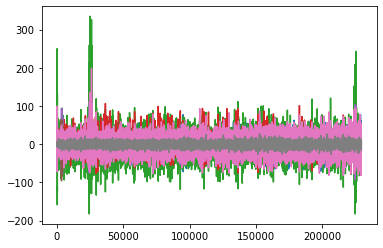

In [6]:
from seizurecast.models.parameters import STD_CHANNEL_01_AR
from seizurecast.data.make_dataset import produce_signal
s = produce_signal(token, montage = STD_CHANNEL_01_AR, fsamp=256)

import matplotlib.pyplot as plt
print(s.shape)
plt.plot(s.T)

In [7]:
# modeling
import pickle
def load_50_patients(edfs):
    """Load 50 datasets ~2 MIN"""
    from seizurecast.data.make_dataset import make_dataset

    # relabeling config
    LEN_PRE = 300  # 5 minutes pre
    LEN_POS = 600
    SEC_GAP = 600  # 10 minutes gap
    SAMPLING_RATE = 256

    token_paths = edfs.sample(50, random_state=0)['token_path'].to_numpy()
    dataset, labels = make_dataset(token_paths, len_pre=LEN_PRE, len_post=LEN_POS, sec_gap=SEC_GAP, fsamp=SAMPLING_RATE)

    with open('../tmp/ds10min.pkl', 'wb') as fp:
        pickle.dump((dataset, labels), fp)

load_50_patients(edfs=df)
"""Load pre-cached dataset"""
with open('../tmp/ds.pkl', 'rb') as fp:
    dataset, labels = pickle.load(fp)

In [ ]:
dataset.shape